In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# ignorer les FuturWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
import os
from creditcard_mod import helpers

In [12]:
for i,row in df.iterrows():
    df.at[i,'category'] = row.category[4:-1]
    df.at[i,'merchant'] = row.merchant[2:-1]
    df.at[i,'customer'] = row.customer[2:-1]
    df.at[i,'age']      = row.age[1:-1]
    df.at[i,'gender']   = row.gender[1:-1]
df.head(2)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,1093826151,4,M,'28007',348934600,'28007',transportation,4.55,0
1,0,352968107,2,M,'28007',348934600,'28007',transportation,39.68,0


In [4]:
#dataset
df = helpers.load_csv("../datasets/data.csv")
df.head(3)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,1093826151,4,M,'28007',348934600,'28007',transportation,4.55,0
1,0,352968107,2,M,'28007',348934600,'28007',transportation,39.68,0
2,0,2054744914,4,F,'28007',1823072687,'28007',transportation,26.89,0


In [13]:
df.to_csv(r'../datasets/data.csv', sep=",", index=False)

Les colonnes suivantes composent le dataset:
* **step** - represents the day when the transaction happened. There is a total of 180 steps, so the data runs for six months.
* **customer** - represents the unique ID of the person who initialized the transaction. It is formed by the letter C, followed by a unique sequence of 10 numbers. There is a total of 4,109 unique customers available in the dataset.
* **age** - this variable is split in age intervals, starting from 0 to 6 and the letter U which stands for Unknown. Age is Unknown only for transactions that have the gender equal to Enterprise.
* **gender** - this variable is coded as F for Female, M for Male, E for Enterprise and U for Unknown.
* **zipcodeOri** and **zipMerchant** - they contained a constant value of 28007, which is a postal code in Ansonville, North Carolina, United States. Therefore, the amount will be from now on expressed in us dollars.
* **category** - there are 15 unique categories that label the general type of the transaction: transportation, food, health, wellness and beauty, fashion, bars and restaurant, hyper, sports and toys, tech, home, hotel services, other services, contents, travel, leisure.
* **amount** - represents the value of the transaction. There are only 52 values equal to 0 and no negative values.
* **fraud** - a flag column coded with 0 if the transaction was clean and with 1 if the transaction was fraudulent.

In [4]:
df.shape

(594643, 10)

In [5]:
df.isnull().values.any()

False

La base de données contient **594 643** observations et **10** variables. Toutes les valeurs sont numériques et il n'y a pas de données manquantes. La variable à expliquer **fraud** représente le type de transaction et prend deux modalités **1** pour **Fraud** et **0** **Non Fraud**.

In [15]:
print(f"unique merchants: {df.merchant.nunique()}")
print(f"unique age: {df.age.nunique()}")
print(f"unique gender: {df.gender.nunique()}")
print(f"unique zipCode Origin: {df.zipcodeOri.nunique()}")
print(f"unique zipCode Merchant: {df.zipMerchant.nunique()}")
print(f"unique category: {df.category.nunique()}")
print(f"unique amount: {df.amount.nunique()}")
print(f"unique fraud: {df.fraud.nunique()}")

unique merchants: 50
unique age: 8
unique gender: 4
unique zipCode Origin: 1
unique zipCode Merchant: 1
unique category: 15
unique amount: 23767
unique fraud: 2


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,594643.0,94.986827,51.053632,0.0,52.00,97.0,139.00,179.00
amount,594643.0,37.890135,111.402831,0.0,13.74,26.9,42.54,8329.96
fraud,594643.0,0.012108,0.109369,0.0,0.00,0.0,0.00,1.00


# **DATA ANALYSIS **

In [15]:
df["fraud"].value_counts(normalize=True)*100

0    98.789189
1     1.210811
Name: fraud, dtype: float64

En observant la répartition des types de transactions, on constate que **587 443** transactions sont non frauduleuses soit **98,78%** contre **7200** transactions frauduleuses soit **1,21%**.

In [52]:
df["category"].value_counts(normalize=True)*100

transportation        84.944917
food                   4.415086
health                 2.713056
wellnessandbeauty      2.536984
fashion                1.085357
barsandrestaurants     1.071735
hyper                  1.025489
sportsandtoys          0.673009
tech                   0.398558
home                   0.333982
hotelservices          0.293285
otherservices          0.153369
contents               0.148829
travel                 0.122426
leisure                0.083916
Name: category, dtype: float64

<AxesSubplot:>

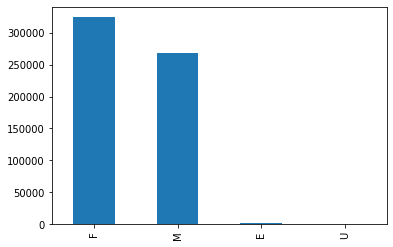

In [28]:
df["gender"].value_counts().plot.bar()

Les **femmes** détiennent le plus grand pourcentage du total des transactions que les **hommes**. **54,5%** du total des transactions sont effectuées par des femmes, **45%** par des hommes et seulement **0,2%** par des entreprises.

<AxesSubplot:>

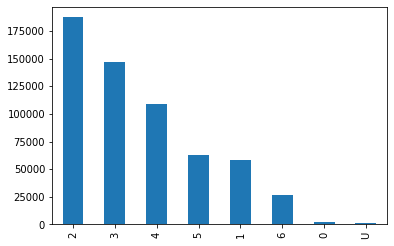

In [73]:
df["age"].value_counts().plot.bar()

In [ ]:
data.hist(figsize=(20,30)) 

In [32]:
pd.crosstab(data['fraud'], data['age'])

age,0,1,2,3,4,5,6,U
fraud,,,,,,,,
0,2404,57442,184966,145376,107615,61956,26513,1171
1,48,689,2344,1755,1410,686,261,7


In [3]:
pd.crosstab(df['fraud'], df['category'])

category,barsandrestaurants,contents,fashion,food,health,home,hotelservices,hyper,leisure,otherservices,sportsandtoys,tech,transportation,travel,wellnessandbeauty
fraud,,,,,,,,,,,,,,,
0,6253,885,6338,26254,14437,1684,1196,5818,25,684,2020,2212,505119,150,14368
1,120,0,116,0,1696,302,548,280,474,228,1982,158,0,578,718


<AxesSubplot:xlabel='amount', ylabel='Density'>

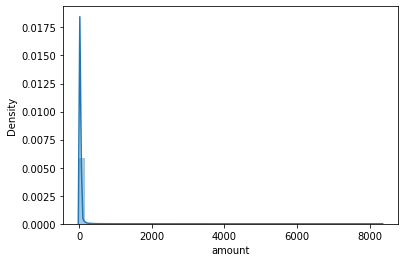

In [36]:
sns.distplot(data['amount'])

In [10]:
data = helpers.load_csv("../datasets/data.csv")

<AxesSubplot:>

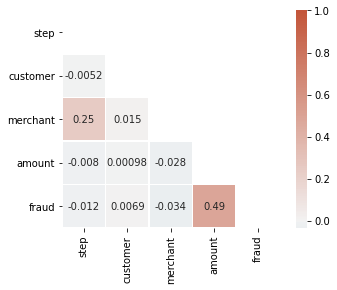

In [45]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.7,cbar_kws={"shrink": 1}, annot=True)

La matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps.On constate que la corrélation entre les choses est très faible donc il n'y a pas de liaison linéaire entre les variables.

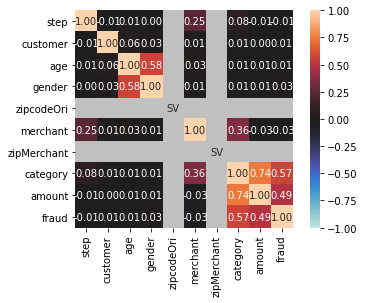

{'corr':                  step  customer       age    gender  zipcodeOri  merchant  \
 step         1.000000 -0.005223  0.010215  0.004673         0.0  0.245727   
 customer    -0.005223  1.000000  0.059381  0.025900         0.0  0.014571   
 age          0.010215  0.059381  1.000000  0.578013         0.0  0.025449   
 gender       0.004673  0.025900  0.578013  1.000000         0.0  0.013435   
 zipcodeOri   0.000000  0.000000  0.000000  0.000000         0.0  0.000000   
 merchant     0.245727  0.014571  0.025449  0.013435         0.0  1.000000   
 zipMerchant  0.000000  0.000000  0.000000  0.000000         0.0  0.000000   
 category     0.082065  0.008980  0.006490  0.010988         0.0  0.355177   
 amount      -0.007961  0.000984  0.007449  0.013080         0.0 -0.028051   
 fraud       -0.011898  0.006938  0.008616  0.025722         0.0 -0.034399   
 
              zipMerchant  category    amount     fraud  
 step                 0.0  0.082065 -0.007961 -0.011898  
 customer       

In [5]:
from dython.nominal import associations
associations(df)

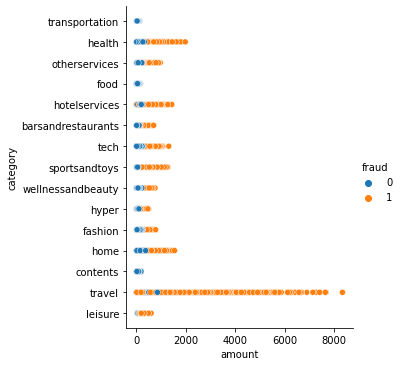

In [42]:
sns.relplot(x="amount", y="category", hue="fraud",
            data=data)

<AxesSubplot:xlabel='amount', ylabel='fraud'>

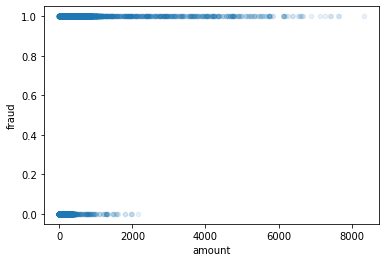

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
df.plot.scatter(
    x="amount", y="fraud", ax=ax, alpha=0.1
)

<AxesSubplot:xlabel='category'>

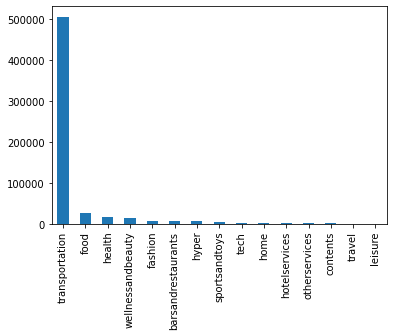

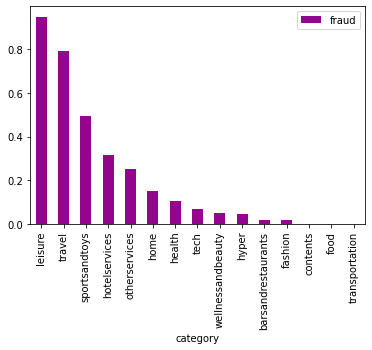

In [11]:
plt.figure()
df["category"].value_counts().plot.bar()
x,y = "category","fraud"
helpers.get_corr_with_target(df, "category","fraud").plot.bar(x,y,color="#94058E")

Les catégories connaissent un déséquilibre de classe élevé. Il y a environ **500 000** soit **85**% des transactions effectuées seulement dans la catégorie des transports, tandis que le reste des transactions se répartit inégalement entre les 14 autres catégories restantes. 

En valeur absolue, les catégories qui ont le plus de cas de fraude sont dans des domaines comme les effets de maison, la santé, le bien-être et la beauté. En allant encore plus loin et en examinant le poids de la fraude par catégorie, on peut voir que **les loisirs**, **les voyages**, **les sports et les jouets** ont plus de **la moitié des transactions** signalées comme des fraudes, tandis que **le transport**, **la nourriture** et **le contenu** n'ont été sujet d'aucune fraude.

<AxesSubplot:xlabel='gender'>

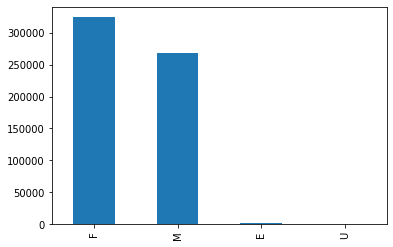

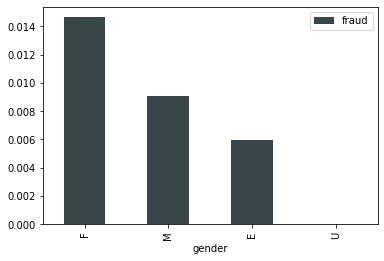

In [6]:
x, y = "gender", "fraud"
df["gender"].value_counts().plot.bar()
helpers.get_corr_with_target(df,x,y).plot.bar(x,y,color="#94058E")

Les catégories d'âge connaissent également un déséquilibre élevé. Les **femmes** dominent largement l'échantillon avec une représentation de plus de **54%** des transactions suivi des **hommes** **45%**. Les **entreprises** sont très faiblement représenté **0,19%** le reste sont de sexe **inconnus**. 

De même, le taux de fraude sexe suit cette tendance. Il s'élève à **1,4%** chez les **femmes**, **0,9%** pour les hommes et seulement **0,6%** pour les **entreprises**.

In [22]:
df["age"].value_counts(normalize=True)*100

2    31.499572
3    24.742745
4    18.334530
5    10.534388
1     9.775781
6     4.502533
0     0.412348
U     0.198102
Name: age, dtype: float64

In [16]:
df["age"].replace({"U": "7"}, inplace=True)
data = df.rename(columns = {'age': 'Cat_Age'}, inplace = False)

0    1.957586
4    1.293281
2    1.251401
3    1.192815
1    1.185254
5    1.095112
6    0.974826
7    0.594228
Name: fraud, dtype: float64

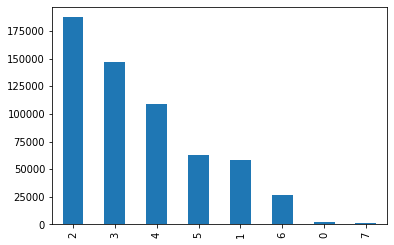

In [30]:
x, y = "Cat_Age", "fraud"
data["Cat_Age"].value_counts().plot.bar()
cat_age_fraud = helpers.get_corr_with_target(data,x,y)
cat_age_fraud["fraud"]*100

Au vu de ce graphe, les classes **[26,35]** et **[36,45]** ans sont les deux catégories les plus actifs dans les transactions, avec des parts respectives de **31,49%** et de **24,74%**. Les catégories **[46,55]** ans et **[56,65]** ans couvrent respectivement **18,33%** et **10,53%** des transactions. Les catégoriees **[26,35]** et **[26,35]** sont les moins représentées, soit respectivement **9,7%** et **4,5%**.

### Analyse du montant

In [63]:
df["amount"].describe().T

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

<AxesSubplot:>

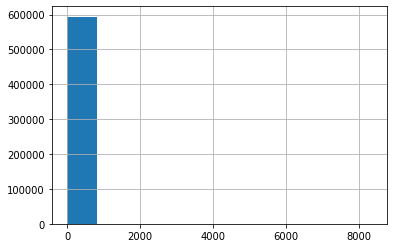

In [64]:
df["amount"].hist()

## Modeling

In [26]:
from creditcard_mod import helpers
df_model = helpers.load_csv("../datasets/first_features.csv")

In [27]:
from sklearn import (
ensemble,
preprocessing,
tree,
)
from sklearn.metrics import (
auc,
confusion_matrix,
roc_auc_score,
roc_curve,
)
from sklearn.model_selection import (
train_test_split,
StratifiedKFold,
)
from sklearn.metrics import classification_report



In [39]:
y = df_model.fraud
X = df_model.drop(columns=["step","customer","merchant","zipcodeOri","zipMerchant","fraud"])

## Echantillonnage des donnees

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=28 ,stratify=y)

In [41]:
X

,age,gender,category,amount,nbre_trans_7jrs,nbre_trans_15jrs,nbre_trans_30jrs
0,4,M,transportation,4.55,0.0,0.0,0.0
1,2,M,transportation,39.68,0.0,0.0,0.0
2,4,F,transportation,26.89,0.0,0.0,0.0
3,3,M,transportation,17.25,0.0,0.0,0.0
4,5,M,transportation,35.72,0.0,0.0,0.0
...,...,...,...,...,...,...,...
594638,3,F,transportation,20.53,6.0,14.0,30.0
594639,4,F,transportation,50.73,6.0,14.0,29.0
594640,2,F,fashion,22.44,5.0,14.0,29.0
594641,5,M,transportation,14.46,6.0,14.0,29.0


In [22]:
y_train.shape

(416250,)

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([411210,   5040]))

## Baseline modele

In [42]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier()
baseline_model.fit(X_train, y_train)
baseline_model.score(X_test, y_test)


0.9878919015880668

In [43]:
y_pred = baseline_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    176233
           1       0.00      0.00      0.00      2160

    accuracy                           0.99    178393
   macro avg       0.49      0.50      0.50    178393
weighted avg       0.98      0.99      0.98    178393



/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

In [22]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier
]:
    cls = model()
    kfold = model_selection.KFold(n_splits=2, random_state=28, shuffle=True)
    cvs = model_selection.cross_val_score(
        cls, X, y, scoring="roc_auc", cv=kfold
    )
    print(
        f"{model.__name__:22}  AUC: "
        f"{cvs.mean():.3f} STD: {cvs.std():.2f}"
    )

DummyClassifier         AUC: 0.500 STD: 0.00


/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/

LogisticRegression      AUC: nan STD: nan


/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py

DecisionTreeClassifier  AUC: nan STD: nan


/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "/home/muhammad/.cache/pypoet

KNeighborsClassifier    AUC: nan STD: nan


/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 207, in fit
    X, y = self._validate_data(X, y)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud

GaussianNB              AUC: nan STD: nan


/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/svm/_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/muhammad/.cache/pypoetry/v

SVC                     AUC: nan STD: nan
RandomForestClassifier  AUC: nan STD: nan


/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/home/muhammad/.cache/pypoetry/virtualenvs/fraud-creditcard-ml-ansh3wJ6-py3.8/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/muhammad/.cache/py